In [1]:
import pandas as pd
import numpy as np
from pydataset import data

from env import user, host, password
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
mpg = data('mpg')

In [3]:
mpg.head()
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [5]:
make_list = list(mpg.manufacturer.unique())

avg_make_mpg = pd.DataFrame(
    ([(make, mpg.avg_mpg[mpg.manufacturer == make].sum() / 
        len(mpg.avg_mpg[mpg.manufacturer == make])) 
        for make in make_list]),
    columns = ['make', 'avg_mpg']
    )
avg_make_mpg[avg_make_mpg.avg_mpg == avg_make_mpg.avg_mpg.max()]
     
     

,make,avg_mpg
4,honda,28.5


In [6]:
avg = pd.DataFrame(mpg.groupby('manufacturer').mean().avg_mpg)
avg.sort_values(by='avg_mpg', ascending=False).head(1)

,avg_mpg
manufacturer,
honda,28.5


In [7]:
len(mpg.manufacturer.value_counts())

15

In [8]:
len(mpg.model.unique())

38

In [9]:
print(f'Automatic cars have an average of \
{mpg.avg_mpg[mpg.trans.str.contains("auto")].mean():.2f} mpg')

Automatic cars have an average of 19.13 mpg


In [10]:
print(f'Manual cars have an average of \
{mpg.avg_mpg[mpg.trans.str.contains("manual")].mean():.2f} mpg')

Manual cars have an average of 22.23 mpg


In [11]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

In [12]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

In [13]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [14]:
# db_name = 'employees'
# url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
# db = pd.read_sql('SELECT * FROM employees LIMIT 5', url)

In [15]:
def get_db_url(user, host, password, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [16]:
url = get_db_url(user, host, password, 'employees')
employees = pd.read_sql('SELECT * FROM employees', url)
titles = pd.read_sql('SELECT * FROM titles', url)

In [17]:
merged = pd.merge(employees, titles,
                  left_on='emp_no', right_on='emp_no')

In [18]:
title_list = list(merged.title.unique())
merged.title.value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [19]:
merged_current = merged[merged.to_date.astype(str).str.contains('9999')]

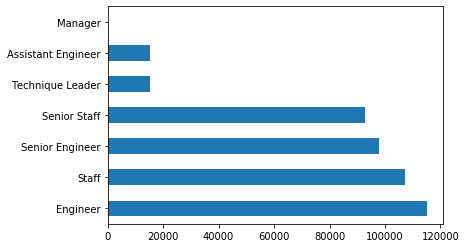

In [20]:
merged.title.value_counts().plot.barh()

In [21]:
old_titles = ~ merged.to_date.astype(str).str.contains('9999')
old_titles = merged[old_titles]

In [22]:
old_totals = old_titles.to_date - old_titles.from_date

In [23]:
old_days = old_totals.astype('timedelta64[D]')

In [24]:
old_totals

3        3287 days
6        2557 days
9        2557 days
10        873 days
11       1826 days
            ...   
443297   1826 days
443299    247 days
443301   2191 days
443303   1826 days
443306   1826 days
Length: 203184, dtype: timedelta64[ns]

In [25]:
old_days

3         3287.0
6         2557.0
9         2557.0
10         873.0
11        1826.0
           ...  
443297    1826.0
443299     247.0
443301    2191.0
443303    1826.0
443306    1826.0
Length: 203184, dtype: float64

In [26]:
bin_list = [365 * i for i in range(19)]

In [27]:
old_days_cuts = pd.cut(old_days,bins=bin_list).value_counts().sort_index()
year_list = [f'{int(years / 365)} years' for years in bin_list]

[Text(0, 0, '0 years'), Text(0, 0, '1 years'), Text(0, 0, '2 years'), Text(0, 0, '3 years'), Text(0, 0, '4 years'), Text(0, 0, '5 years'), Text(0, 0, '6 years'), Text(0, 0, '7 years'), Text(0, 0, '8 years'), Text(0, 0, '9 years'), Text(0, 0, '10 years'), Text(0, 0, '11 years'), Text(0, 0, '12 years'), Text(0, 0, '13 years'), Text(0, 0, '14 years'), Text(0, 0, '15 years'), Text(0, 0, '16 years'), Text(0, 0, '17 years')]


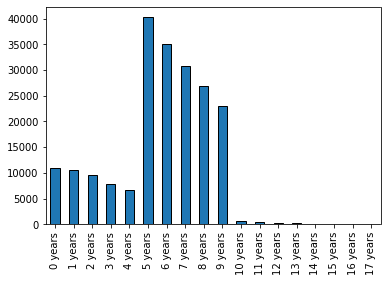

In [28]:
plotting = old_days_cuts.plot.bar(edgecolor='black')
print(plotting.set_xticklabels(year_list))

In [29]:
merged.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [30]:
tables = pd.read_sql('SHOW TABLES', url)
tables

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,employees_with_departments
7,salaries
8,titles


In [31]:
dept_emp = pd.read_sql('SELECT * FROM dept_emp', url)

In [32]:
dept_emp

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
...,...,...,...,...
331598,499995,d004,1997-06-02,9999-01-01
331599,499996,d004,1996-05-13,9999-01-01
331600,499997,d005,1987-08-30,9999-01-01
331601,499998,d002,1993-12-27,9999-01-01


In [33]:
new_merged = pd.merge(merged, dept_emp, left_on='emp_no', right_on='emp_no')

In [34]:
pd.crosstab(new_merged.title, new_merged.dept_no)

dept_no,d001,d002,d003,d004,d005,d006,d007,d008,d009
title,,,,,,,,,
Assistant Engineer,0,0,0,6445,7769,1831,0,378,298
Engineer,0,0,0,49649,58135,13852,0,2986,2362
Manager,2,2,2,4,2,4,2,2,4
Senior Engineer,0,0,0,42205,49326,11864,0,2570,2027
Senior Staff,13940,12139,12274,1270,1247,0,36191,11637,13925
Staff,16196,13929,14342,1478,1424,0,41808,13495,16150
Technique Leader,0,0,0,6557,7683,1795,0,393,309


In [35]:
url_2 = get_db_url(user, host, password, 'chipotle')
chipotle_tables = pd.read_sql('SHOW TABLES', url_2)

In [36]:
chipotle_tables

,Tables_in_chipotle
0,orders


In [37]:
orders = pd.read_sql('SELECT * FROM orders', url_2)

In [38]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [39]:
orders.item_price.str.replace('$','').astype(float).sum()

34500.16

In [58]:
(orders.groupby('item_name').quantity.sum().reset_index()
 .sort_values('quantity', ascending=False))#['quantity'].nlargest(3)

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351
23,Chips,230
38,Steak Bowl,221
6,Bottled Water,211
24,Chips and Fresh Tomato Salsa,130
9,Canned Soda,126


In [ ]:
orders.item_price = orders.item_price.str.replace('$','').astype(float)

In [ ]:
item_group = orders.groupby('item_name').sum()[['item_price']]
item_group.sort_values(by='item_price', ascending=False).head(1)

